#Import Packages

In [ ]:
#IMPORT MODULES
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import Data

In [ ]:
# URL CSV untuk sheet "mentah"
csv_url = 'https://docs.google.com/spreadsheets/d/1at1-KUFm4nnRxRl5TcPd9Yl3yD6hNiRL/gviz/tq?tqx=out:csv&sheet=mentah'

# Membaca data dari CSV
data = pd.read_csv(csv_url)

# Menampilkan beberapa baris pertama data
print(data.head())

         name      date  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Yogyakarta  1/1/2020     31.1     23.3  25.2          37.9          23.3   
1  Yogyakarta  1/2/2020     30.1     22.7  25.8          35.2          22.7   
2  Yogyakarta  1/3/2020     30.1     23.4  25.9          36.3          23.4   
3  Yogyakarta  1/4/2020     30.1     23.6  25.7          36.3          23.6   
4  Yogyakarta  1/5/2020     29.1     23.2  25.4          35.8          23.2   

   feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
0       26.4  23.8      91.9  ...          7.3        3         NaN   
1       27.4  23.4      87.1  ...         19.2        8         NaN   
2       27.5  23.7      88.3  ...         14.8        8         NaN   
3       26.9  23.7      89.1  ...         13.2        6         NaN   
4       26.9  23.8      91.3  ...         13.3        6         NaN   

               sunrise               sunset  moonphase  \
0  2020-01-01T05:24:38  2020-01-01T17:58

In [ ]:
# Seleksi hanya kolom numerik untuk analisis deskriptif
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Fungsi deskriptif untuk data numerik
def descriptive_statistics(df):
    desc_stats = pd.DataFrame(index=df.columns)

    # Min
    desc_stats['Min'] = df.min()

    # Q1 (Kuartil pertama / 25th percentile)
    desc_stats['Q1'] = df.quantile(0.25)

    # Median
    desc_stats['Median'] = df.median()

    # Q3 (Kuartil ketiga / 75th percentile)
    desc_stats['Q3'] = df.quantile(0.75)

    # Max
    desc_stats['Max'] = df.max()

    # Mean
    desc_stats['Mean'] = df.mean()

    # Mode (mengembalikan mode pertama jika ada lebih dari satu)
    desc_stats['Mode'] = df.mode().iloc[0]

    # Standar Deviasi
    desc_stats['Std Dev'] = df.std()

    return desc_stats

# Memanggil fungsi deskriptif hanya pada kolom numerik
descriptive_stats = descriptive_statistics(numeric_data)

# Menampilkan hasil analisis deskriptif yang diperbarui
print(descriptive_stats)

                     Min        Q1  Median       Q3      Max         Mean  \
tempmax             23.8    29.600    30.6    31.70    39.10    30.721302   
tempmin             17.1    21.800    22.5    23.00    25.40    22.252282   
temp                22.1    24.800    25.5    26.20    28.50    25.513573   
feelslikemax        23.8    32.300    33.9    36.00    56.50    34.334388   
feelslikemin        17.1    21.800    22.5    23.00    25.40    22.252282   
feelslike           22.1    25.500    26.5    27.50    32.90    26.560864   
dew                 15.2    21.200    22.0    23.00    25.10    21.890079   
humidity            64.0    79.200    82.2    85.20    95.90    81.879002   
precip               0.0     0.400     3.0    10.00   131.10     7.193488   
precipprob           0.0   100.000   100.0   100.00   100.00    87.279367   
precipcover          0.0    12.500    37.5    54.20   100.00    36.878393   
snow                 0.0     0.000     0.0     0.00     0.00     0.000000   

# Missing Value

In [ ]:
# URL CSV untuk sheet "mentah"
csv_url1 = 'https://docs.google.com/spreadsheets/d/1at1-KUFm4nnRxRl5TcPd9Yl3yD6hNiRL/gviz/tq?tqx=out:csv&sheet=raw'

# Membaca data dari CSV
data1 = pd.read_csv(csv_url1)

# Menampilkan beberapa baris pertama data
print(data1.head())

       date  temp  tempmax  tempmin   dew  humidity  precip  precipcover  \
0  1/1/2020  25.2     31.1     23.3  23.8      91.9    52.8         87.5   
1  1/2/2020  25.8     30.1     22.7  23.4      87.1    19.1         66.7   
2  1/3/2020  25.9     30.1     23.4  23.7      88.3     9.1         54.2   
3  1/4/2020  25.7     30.1     23.6  23.7      89.1     9.9         75.0   
4  1/5/2020  25.4     29.1     23.2  23.8      91.3    18.5         87.5   

   windgust  windspeed  winddir  sealevelpressure  cloudcover  visibility  \
0      27.4        9.4     64.5            1012.0        81.2         4.3   
1      30.2       18.4    258.7            1012.7        85.4         6.8   
2      37.4       27.7    311.5            1010.5        75.0         5.9   
3      43.6       13.3    251.0            1009.1        79.3         6.4   
4      47.5       22.7    254.1            1009.4        79.1         5.5   

   solarradiation  solarenergy  uvindex  
0            90.5          7.3        

Jumlah missing value 
 date                  0
temp                  0
tempmax               0
tempmin               0
dew                   0
humidity              0
precip                0
precipcover           0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility          405
solarradiation        0
solarenergy           0
uvindex               0
dtype: int64


<Figure size 1000x600 with 0 Axes>

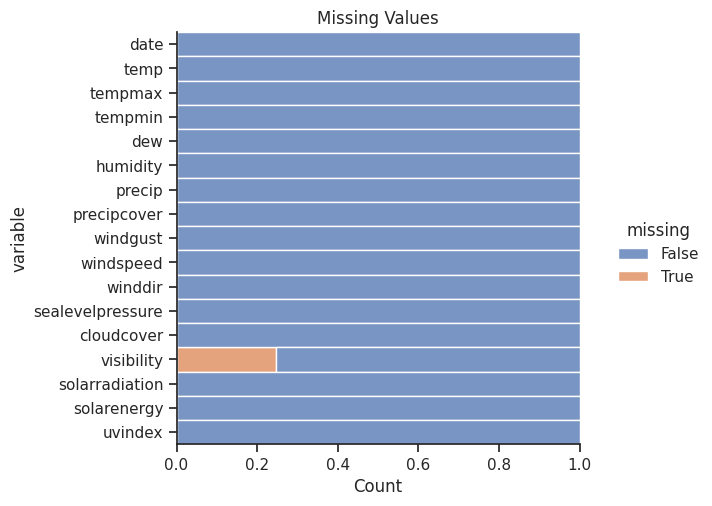

In [ ]:
##Pengecekan missing value
sns.set_theme(style="ticks")
print('Jumlah missing value \n', data1.isna().sum())
plt.figure(figsize=(10,6))
ax = sns.displot(data=data1.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25)
ax.set(title='Missing Values')

In [ ]:
data=data.dropna(axis=1)

Jumlah missing value 
 name                0
date                0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
solarenergy         0
uvindex             0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64


<Figure size 1000x600 with 0 Axes>

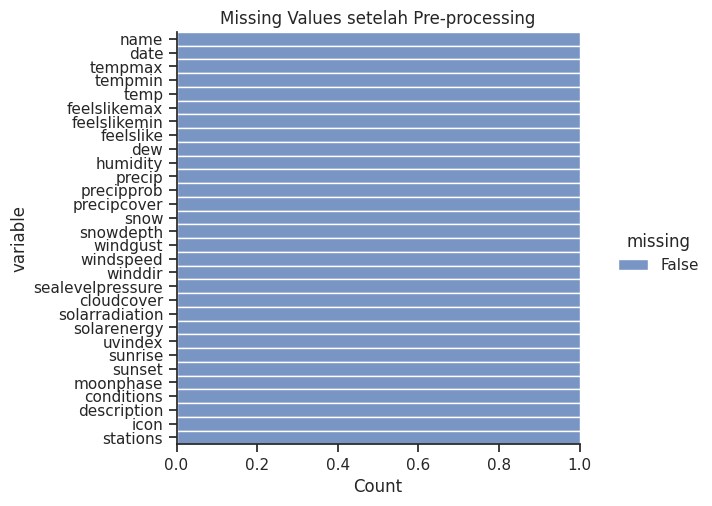

In [ ]:
##Pengecekan missing value
sns.set_theme(style="ticks")
print('Jumlah missing value \n', data.isna().sum())
plt.figure(figsize=(10,6))
ax = sns.displot(data=data.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25)
ax.set(title='Missing Values setelah Pre-processing')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1643 non-null   object 
 1   date              1643 non-null   object 
 2   tempmax           1643 non-null   float64
 3   tempmin           1643 non-null   float64
 4   temp              1643 non-null   float64
 5   feelslikemax      1643 non-null   float64
 6   feelslikemin      1643 non-null   float64
 7   feelslike         1643 non-null   float64
 8   dew               1643 non-null   float64
 9   humidity          1643 non-null   float64
 10  precip            1643 non-null   float64
 11  precipprob        1643 non-null   int64  
 12  precipcover       1643 non-null   float64
 13  snow              1643 non-null   int64  
 14  snowdepth         1643 non-null   int64  
 15  windgust          1643 non-null   float64
 16  windspeed         1643 non-null   float64


In [ ]:
# convert to datetime
data.set_index('date', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1643 entries, 1/1/2020 to 6/30/2024
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1643 non-null   object 
 1   tempmax           1643 non-null   float64
 2   tempmin           1643 non-null   float64
 3   temp              1643 non-null   float64
 4   feelslikemax      1643 non-null   float64
 5   feelslikemin      1643 non-null   float64
 6   feelslike         1643 non-null   float64
 7   dew               1643 non-null   float64
 8   humidity          1643 non-null   float64
 9   precip            1643 non-null   float64
 10  precipprob        1643 non-null   int64  
 11  precipcover       1643 non-null   float64
 12  snow              1643 non-null   int64  
 13  snowdepth         1643 non-null   int64  
 14  windgust          1643 non-null   float64
 15  windspeed         1643 non-null   float64
 16  winddir           1643 non-null   f

In [ ]:
data=data.select_dtypes(include=['int64', 'float64'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1643 entries, 1/1/2020 to 6/30/2024
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           1643 non-null   float64
 1   tempmin           1643 non-null   float64
 2   temp              1643 non-null   float64
 3   feelslikemax      1643 non-null   float64
 4   feelslikemin      1643 non-null   float64
 5   feelslike         1643 non-null   float64
 6   dew               1643 non-null   float64
 7   humidity          1643 non-null   float64
 8   precip            1643 non-null   float64
 9   precipprob        1643 non-null   int64  
 10  precipcover       1643 non-null   float64
 11  snow              1643 non-null   int64  
 12  snowdepth         1643 non-null   int64  
 13  windgust          1643 non-null   float64
 14  windspeed         1643 non-null   float64
 15  winddir           1643 non-null   float64
 16  sealevelpressure  1643 non-null   f

In [ ]:
data

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,moonphase
date,,,,,,,,,,,,,,,,,,,,,
1/1/2020,31.1,23.3,25.2,37.9,23.3,26.4,23.8,91.9,52.8,100,...,0,27.4,9.4,64.5,1012.0,81.2,90.5,7.3,3,0.19
1/2/2020,30.1,22.7,25.8,35.2,22.7,27.4,23.4,87.1,19.1,100,...,0,30.2,18.4,258.7,1012.7,85.4,221.1,19.2,8,0.22
1/3/2020,30.1,23.4,25.9,36.3,23.4,27.5,23.7,88.3,9.1,100,...,0,37.4,27.7,311.5,1010.5,75.0,171.7,14.8,8,0.25
1/4/2020,30.1,23.6,25.7,36.3,23.6,26.9,23.7,89.1,9.9,100,...,0,43.6,13.3,251.0,1009.1,79.3,151.6,13.2,6,0.29
1/5/2020,29.1,23.2,25.4,35.8,23.2,26.9,23.8,91.3,18.5,100,...,0,47.5,22.7,254.1,1009.4,79.1,152.0,13.3,6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/26/2024,31.2,22.0,25.6,34.2,22.0,26.5,21.4,79.1,0.6,100,...,0,27.0,18.4,67.9,1009.4,52.6,228.2,19.7,8,0.65
6/27/2024,31.4,22.8,26.0,34.4,22.8,27.0,22.0,80.2,2.3,100,...,0,18.7,15.1,70.1,1010.3,36.4,201.5,17.5,8,0.69
6/28/2024,30.1,22.5,25.5,33.5,22.5,26.6,22.2,83.6,5.2,100,...,0,17.3,9.4,187.8,1011.4,55.1,221.2,19.1,7,0.72


# Plot Time Series

<Axes: title={'center': 'Data Temperatur Rata-rata Harian DI Yogyakarta'}, xlabel='Periode', ylabel='Temperatur'>

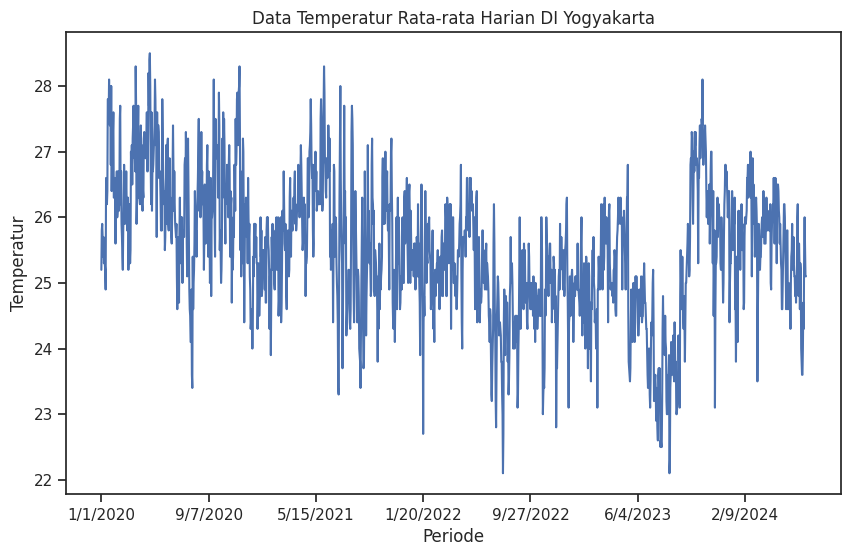

In [ ]:
data['temp'].plot(title='Data Temperatur Rata-rata Harian DI Yogyakarta', xlabel = 'Periode',ylabel = 'Temperatur', figsize=(10,6))

# Splitting Data

In [ ]:
data.reset_index(inplace=True)

In [ ]:
x_new = data['temp']
time_new = data['date']

In [ ]:
#SPLITTING DATA
##Define the split time
split_time = int(len(x_new)*0.8)
split_time

1314

In [ ]:
##Get the train set
time_train = time_new[:split_time]
x_train = x_new[:split_time]

In [ ]:
##Get the test set
time_test = time_new[split_time:]
x_test = x_new[split_time:]
print("Rentang awal data latih: ", time_train[0])
print("Rentang akhir data latih: ", time_train[0+1313])
print("Rentang awal data uji: ", time_test[0+1314])
print("Rentang akhir data uji: ", time_test[0+1314+328])

Rentang awal data latih:  1/1/2020
Rentang akhir data latih:  8/6/2023
Rentang awal data uji:  8/7/2023
Rentang akhir data uji:  6/30/2024


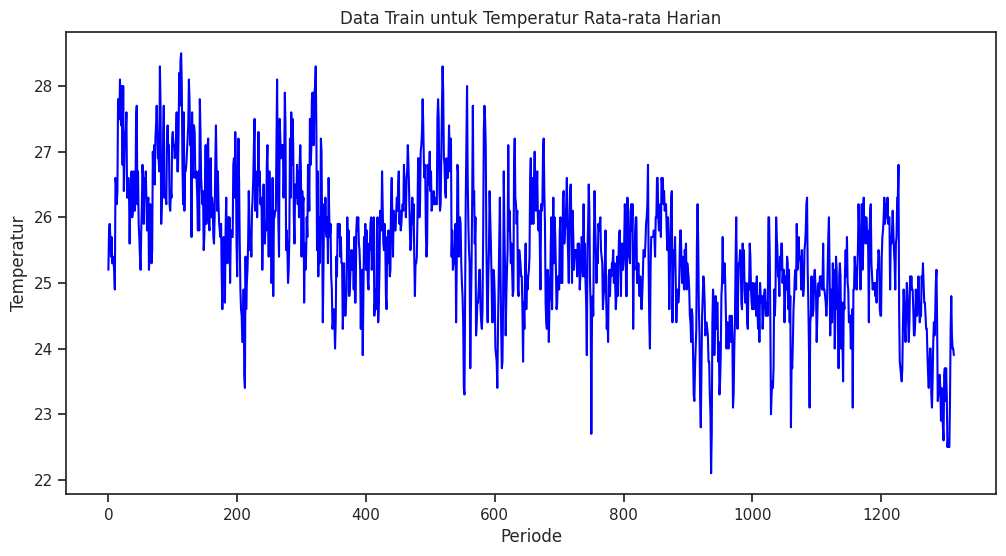

In [ ]:
##Plot Data Train
plt.figure(figsize=(12,6))
plt.plot(x_train.tolist(), color='blue')
plt.ylabel('Temperatur')
plt.xlabel('Periode')
plt.title('Data Train untuk Temperatur Rata-rata Harian')
plt.show()

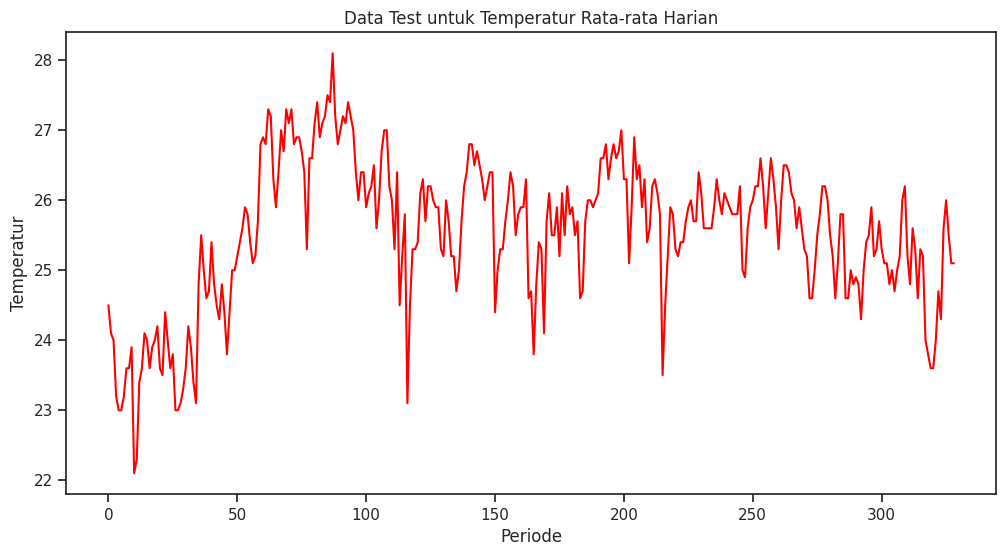

In [ ]:
##Plot Data Test
plt.figure(figsize=(12,6))
plt.plot(x_test.tolist(), color='red')
plt.ylabel('Temperatur')
plt.xlabel('Periode')
plt.title('Data Test untuk Temperatur Rata-rata Harian')
plt.show()

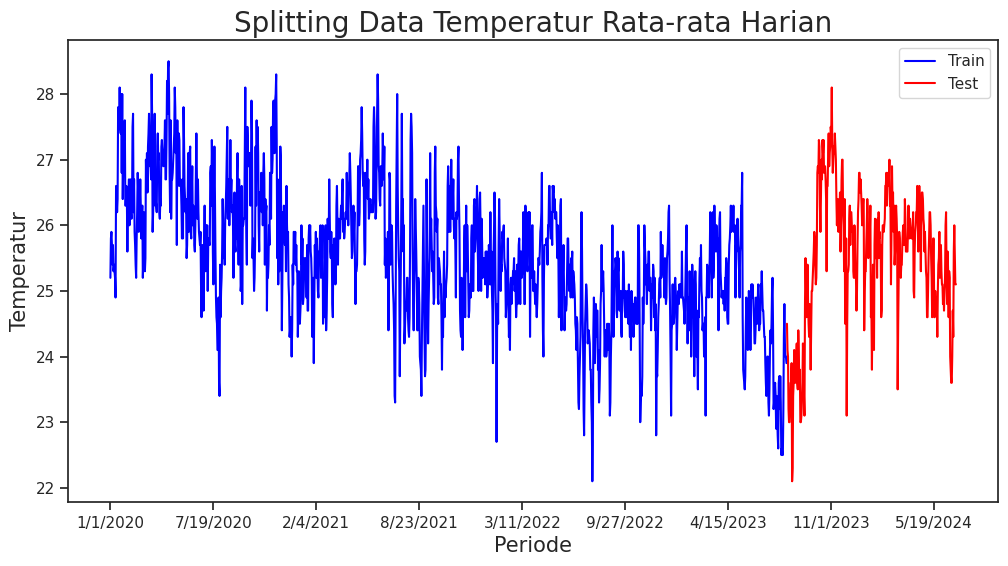

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Plot data train dan test
plt.figure(figsize=(12,6))
plt.plot(time_train, x_train, label = 'Train', color='blue')
plt.plot(time_test, x_test, label = 'Test', color='red')

# Mengatur label sumbu-x dengan MaxNLocator agar jumlah label lebih sedikit dan tidak tumpang tindih
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))  # Menentukan jumlah label yang ingin ditampilkan

# Menambahkan label dan judul
plt.xlabel('Periode', size=15)
plt.ylabel('Temperatur', size=15)
plt.title('Splitting Data Temperatur Rata-rata Harian', size=20)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

# Heatmap

In [ ]:
# URL CSV untuk sheet "mentah"
csv_url = 'https://docs.google.com/spreadsheets/d/1at1-KUFm4nnRxRl5TcPd9Yl3yD6hNiRL/gviz/tq?tqx=out:csv&sheet=raw'

# Membaca data dari CSV
data = pd.read_csv(csv_url)

# Menampilkan beberapa baris pertama data
print(data.head())

       date  temp  tempmax  tempmin   dew  humidity  precip  precipcover  \
0  1/1/2020  25.2     31.1     23.3  23.8      91.9    52.8         87.5   
1  1/2/2020  25.8     30.1     22.7  23.4      87.1    19.1         66.7   
2  1/3/2020  25.9     30.1     23.4  23.7      88.3     9.1         54.2   
3  1/4/2020  25.7     30.1     23.6  23.7      89.1     9.9         75.0   
4  1/5/2020  25.4     29.1     23.2  23.8      91.3    18.5         87.5   

   windgust  windspeed  winddir  sealevelpressure  cloudcover  visibility  \
0      27.4        9.4     64.5            1012.0        81.2         4.3   
1      30.2       18.4    258.7            1012.7        85.4         6.8   
2      37.4       27.7    311.5            1010.5        75.0         5.9   
3      43.6       13.3    251.0            1009.1        79.3         6.4   
4      47.5       22.7    254.1            1009.4        79.1         5.5   

   solarradiation  solarenergy  uvindex  
0            90.5          7.3        

In [ ]:
# convert to datetime
data.set_index('date', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1643 entries, 1/1/2020 to 6/30/2024
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              1643 non-null   float64
 1   tempmax           1643 non-null   float64
 2   tempmin           1643 non-null   float64
 3   dew               1643 non-null   float64
 4   humidity          1643 non-null   float64
 5   precip            1643 non-null   float64
 6   precipcover       1643 non-null   float64
 7   windgust          1643 non-null   float64
 8   windspeed         1643 non-null   float64
 9   winddir           1643 non-null   float64
 10  sealevelpressure  1643 non-null   float64
 11  cloudcover        1643 non-null   float64
 12  visibility        1238 non-null   float64
 13  solarradiation    1643 non-null   float64
 14  solarenergy       1643 non-null   float64
 15  uvindex           1643 non-null   int64  
dtypes: float64(15), int64(1)
memory usa

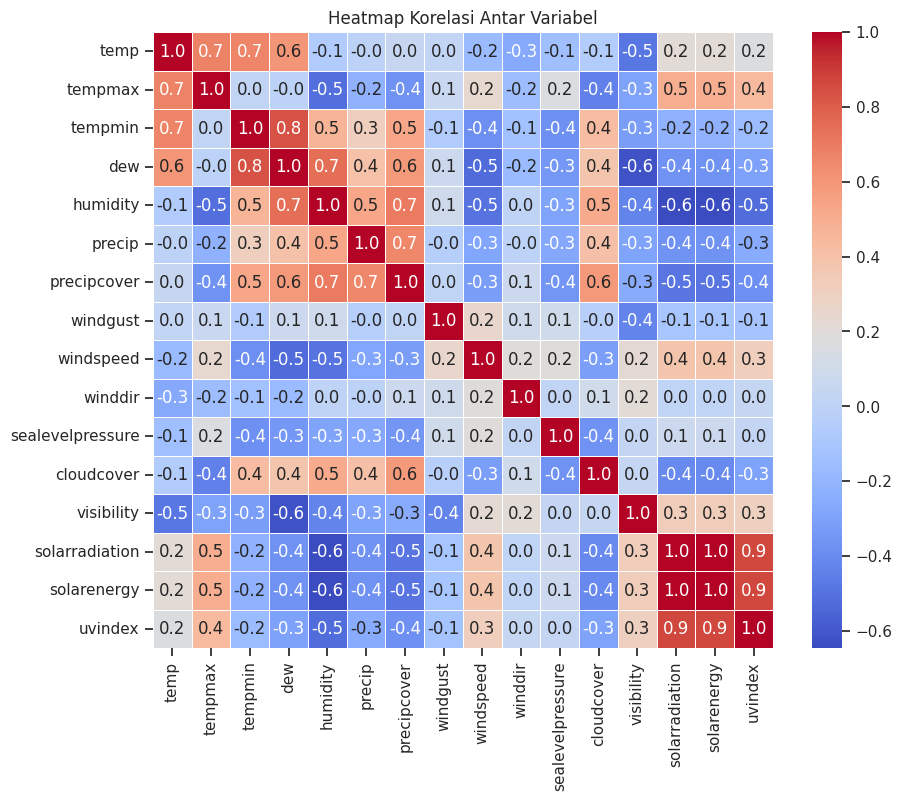

In [ ]:
# Hitung matriks korelasi
corr_matrix = data.corr()

# Buat heatmap
plt.figure(figsize=(10,8))  # Sesuaikan ukuran heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

# Tambahkan judul
plt.title("Heatmap Korelasi Antar Variabel")

# Tampilkan plot
plt.show()

#Feature Selection with Random Forest

In [ ]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Pilih fitur terbaik berdasarkan analisis sebelumnya
selected_features = ['tempmax',	'tempmin',	'dew',	'humidity',	'precip',	'precipcover',	'windgust',	'windspeed',	'winddir',	'sealevelpressure',	'cloudcover',	'solarradiation',	'solarenergy',	'uvindex']

# Definisikan ulang X dan y
X = data[selected_features]
y = data['temp']

# Pisahkan data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dapatkan pentingnya fitur
feature_importance = rf_model.feature_importances_

# Buat DataFrame untuk fitur dan kepentingannya
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Jika ingin menampilkan dengan tampilan yang lebih rapi di Jupyter Notebook:
from IPython.display import display
display(feature_importance_df)

,Feature,Importance
0,tempmax,0.494670
1,tempmin,0.371960
2,dew,0.043333
3,humidity,0.018442
8,winddir,0.011881
10,cloudcover,0.009240
11,solarradiation,0.008339
4,precip,0.007989
12,solarenergy,0.007343
6,windgust,0.007114


In [ ]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor  # Untuk ANN sederhana
import matplotlib.pyplot as plt

# Asumsikan 'data' sudah didefinisikan sebelumnya
# Pilih fitur terbaik berdasarkan analisis sebelumnya
selected_features = ['tempmax', 'tempmin', 'dew', 'humidity', 'precip', 'precipcover',
                     'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
                     'solarradiation', 'solarenergy', 'uvindex']

# Definisikan ulang X dan y
X = data[selected_features]
y = data['temp']

# Pisahkan data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dapatkan pentingnya fitur
feature_importance = rf_model.feature_importances_

# Buat DataFrame untuk fitur dan kepentingannya
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Tampilkan fitur dan kepentingannya
print("Feature Importance Ranking:")
print(feature_importance_df)

Feature Importance Ranking:
             Feature  Importance
0            tempmax    0.494670
1            tempmin    0.371960
2                dew    0.043333
3           humidity    0.018442
8            winddir    0.011881
10        cloudcover    0.009240
11    solarradiation    0.008339
4             precip    0.007989
12       solarenergy    0.007343
6           windgust    0.007114
7          windspeed    0.006701
9   sealevelpressure    0.006594
5        precipcover    0.004298
13           uvindex    0.002095


In [ ]:
# Uji berbagai ambang batas dengan Cross-Validation
thresholds = [0.001, 0.005, 0.01, 0.05, 0.1]  # Daftar ambang batas yang akan diuji
cv_folds = 5  # Jumlah fold untuk cross-validation
results = {}

for threshold in thresholds:
    # Pilih fitur berdasarkan ambang batas
    selected_features_threshold = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

    if not selected_features_threshold:  # Jika tidak ada fitur yang lolos ambang
        print(f"Tidak ada fitur yang melewati ambang {threshold}")
        continue

    # Filter dataset dengan fitur yang dipilih
    X_train_threshold = X_train[selected_features_threshold]
    X_test_threshold = X_test[selected_features_threshold]

    # Latih Random Forest lagi dengan fitur yang dipilih
    rf_model_threshold = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model_threshold.fit(X_train_threshold, y_train)

    # Hitung MSE dengan cross-validation
    cv_scores = -cross_val_score(rf_model_threshold, X_train_threshold, y_train, cv=cv_folds, scoring='neg_mean_squared_error')
    mean_mse = np.mean(cv_scores)
    std_mse = np.std(cv_scores)

    # Prediksi pada data test untuk validasi tambahan
    y_pred = rf_model_threshold.predict(X_test_threshold)
    test_mse = mean_squared_error(y_test, y_pred)

    results[threshold] = {'Selected Features': selected_features_threshold, 'Mean CV MSE': mean_mse, 'Std CV MSE': std_mse, 'Test MSE': test_mse}
    print(f"\nAmbang batas: {threshold}")
    print(f"Fitur yang dipilih: {selected_features_threshold}")
    print(f"Rata-rata MSE (Cross-Validation): {mean_mse:.4f} (+/- {std_mse:.4f})")
    print(f"MSE pada data test: {test_mse:.4f}")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Tampilkan hasil dalam DataFrame untuk perbandingan
results_df = pd.DataFrame(results).T
print("\nRingkasan Hasil Cross-Validation:")
print(results_df)


Ambang batas: 0.001
Fitur yang dipilih: ['tempmax', 'tempmin', 'dew', 'humidity', 'winddir', 'cloudcover', 'solarradiation', 'precip', 'solarenergy', 'windgust', 'windspeed', 'sealevelpressure', 'precipcover', 'uvindex']
Rata-rata MSE (Cross-Validation): 0.0815 (+/- 0.0070)
MSE pada data test: 0.0791

Ambang batas: 0.005
Fitur yang dipilih: ['tempmax', 'tempmin', 'dew', 'humidity', 'winddir', 'cloudcover', 'solarradiation', 'precip', 'solarenergy', 'windgust', 'windspeed', 'sealevelpressure']
Rata-rata MSE (Cross-Validation): 0.0812 (+/- 0.0066)
MSE pada data test: 0.0782

Ambang batas: 0.01
Fitur yang dipilih: ['tempmax', 'tempmin', 'dew', 'humidity', 'winddir']
Rata-rata MSE (Cross-Validation): 0.0701 (+/- 0.0057)
MSE pada data test: 0.0630

Ambang batas: 0.05
Fitur yang dipilih: ['tempmax', 'tempmin']
Rata-rata MSE (Cross-Validation): 0.1489 (+/- 0.0159)
MSE pada data test: 0.1567

Ambang batas: 0.1
Fitur yang dipilih: ['tempmax', 'tempmin']
Rata-rata MSE (Cross-Validation): 0.1489

In [ ]:
# Uji berbagai ambang batas dengan Cross-Validation
thresholds = [0.001, 0.005, 0.01, 0.05, 0.1]  # Daftar ambang batas yang akan diuji
cv_folds = 5  # Jumlah fold untuk cross-validation
results = {}

for threshold in thresholds:
    # Pilih fitur berdasarkan ambang batas
    selected_features_threshold = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

    if not selected_features_threshold:  # Jika tidak ada fitur yang lolos ambang
        print(f"Tidak ada fitur yang melewati ambang {threshold}")
        continue

    # Filter dataset dengan fitur yang dipilih
    X_train_threshold = X_train[selected_features_threshold]
    X_test_threshold = X_test[selected_features_threshold]

    # Latih Random Forest lagi dengan fitur yang dipilih
    rf_model_threshold = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model_threshold.fit(X_train_threshold, y_train)

    # Hitung MSE dengan cross-validation
    cv_scores = -cross_val_score(rf_model_threshold, X_train_threshold, y_train, cv=cv_folds, scoring='neg_mean_squared_error')
    mean_mse = np.mean(cv_scores)
    std_mse = np.std(cv_scores)

    # Prediksi pada data test untuk validasi tambahan
    y_pred = rf_model_threshold.predict(X_test_threshold)
    test_mse = mean_squared_error(y_test, y_pred)

    results[threshold] = {'Selected Features': selected_features_threshold, 'Mean CV MSE': mean_mse, 'Std CV MSE': std_mse, 'Test MSE': test_mse}
    print(f"\nAmbang batas: {threshold}")
    print(f"Fitur yang dipilih: {selected_features_threshold}")
    print(f"Rata-rata MSE (Cross-Validation): {mean_mse:.4f} (+/- {std_mse:.4f})")
    print(f"MSE pada data test: {test_mse:.4f}")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Tampilkan hasil dalam DataFrame untuk perbandingan
results_df = pd.DataFrame(results).T
print("\nRingkasan Hasil Cross-Validation:")
print(results_df)


Ambang batas: 0.001
Fitur yang dipilih: ['tempmax', 'tempmin', 'dew', 'humidity', 'winddir', 'cloudcover', 'solarradiation', 'precip', 'solarenergy', 'windgust', 'windspeed', 'sealevelpressure', 'precipcover', 'uvindex']
Rata-rata MSE (Cross-Validation): 0.0815 (+/- 0.0070)
MSE pada data test: 0.0791

Ambang batas: 0.005
Fitur yang dipilih: ['tempmax', 'tempmin', 'dew', 'humidity', 'winddir', 'cloudcover', 'solarradiation', 'precip', 'solarenergy', 'windgust', 'windspeed', 'sealevelpressure']
Rata-rata MSE (Cross-Validation): 0.0812 (+/- 0.0066)
MSE pada data test: 0.0782

Ambang batas: 0.01
Fitur yang dipilih: ['tempmax', 'tempmin', 'dew', 'humidity', 'winddir']
Rata-rata MSE (Cross-Validation): 0.0701 (+/- 0.0057)
MSE pada data test: 0.0630

Ambang batas: 0.05
Fitur yang dipilih: ['tempmax', 'tempmin']
Rata-rata MSE (Cross-Validation): 0.1489 (+/- 0.0159)
MSE pada data test: 0.1567

Ambang batas: 0.1
Fitur yang dipilih: ['tempmax', 'tempmin']
Rata-rata MSE (Cross-Validation): 0.1489

In [ ]:
results_df.to_excel("crossvalidation.xlsx", index=False)

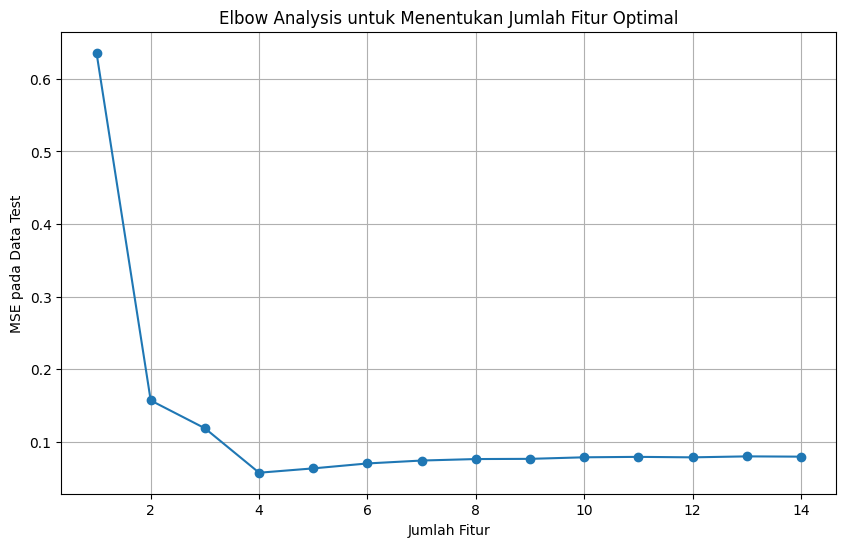

In [ ]:
# Elbow Analysis: Plot MSE terhadap jumlah fitur
num_features_list = range(1, len(selected_features) + 1)
mse_values = []

for num_features in num_features_list:
    selected_features_elbow = feature_importance_df.nlargest(num_features, 'Importance')['Feature'].tolist()
    X_train_elbow = X_train[selected_features_elbow]
    X_test_elbow = X_test[selected_features_elbow]

    rf_model_elbow = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model_elbow.fit(X_train_elbow, y_train)
    y_pred_elbow = rf_model_elbow.predict(X_test_elbow)
    mse_values.append(mean_squared_error(y_test, y_pred_elbow))

plt.figure(figsize=(10, 6))
plt.plot(num_features_list, mse_values, marker='o')
plt.xlabel('Jumlah Fitur')
plt.ylabel('MSE pada Data Test')
plt.title('Elbow Analysis untuk Menentukan Jumlah Fitur Optimal')
plt.grid(True)
plt.show()

In [ ]:
# (Opsional) Validasi dengan ANN
best_threshold = min(results, key=lambda x: results[x]['Mean CV MSE'])
best_features = results[best_threshold]['Selected Features']
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_model.fit(X_train_best, y_train)
y_pred_ann = ann_model.predict(X_test_best)
ann_mse = mean_squared_error(y_test, y_pred_ann)

print(f"\nValidasi dengan ANN untuk ambang terbaik ({best_threshold}):")
print(f"Fitur yang dipilih: {best_features}")
print(f"MSE pada data test dengan ANN: {ann_mse:.4f}")


Validasi dengan ANN untuk ambang terbaik (0.01):
Fitur yang dipilih: ['tempmax', 'tempmin', 'dew', 'humidity', 'winddir']
MSE pada data test dengan ANN: 0.1770


# Normalitas Data

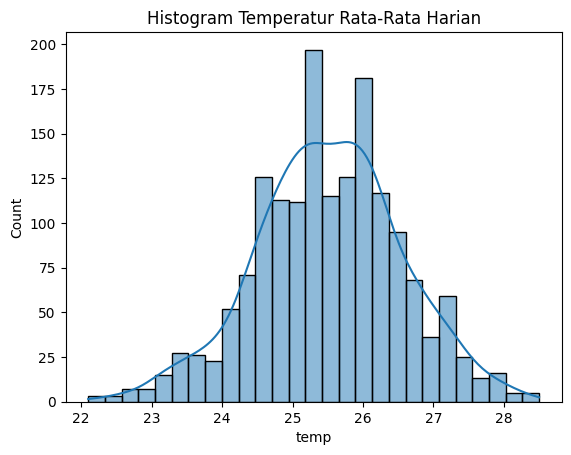

In [ ]:
# Histogram
sns.histplot(data['temp'], kde=True)
plt.title('Histogram Temperatur Rata-Rata Harian')
plt.show()

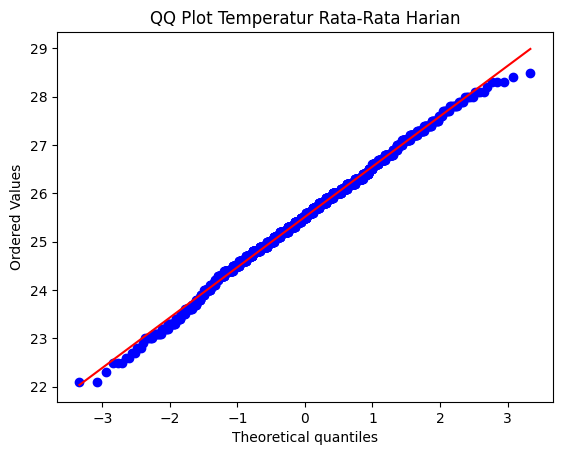

In [ ]:
# QQ Plot
import scipy.stats as stats
stats.probplot(data['temp'], dist="norm", plot=plt)
plt.title('QQ Plot Temperatur Rata-Rata Harian')
plt.show()

In [ ]:
from scipy.stats import normaltest

# Uji normalitas dengan D’Agostino–Pearson
dag_stat, dag_p = normaltest(data['temp'])

# Menampilkan hasil
print(f"D’Agostino–Pearson Test Statistic        = {round(dag_stat, 3)}")
print(f"P-value D’Agostino–Pearson Test          = {round(dag_p, 3)}")

D’Agostino–Pearson Test Statistic        = 3.757
P-value D’Agostino–Pearson Test          = 0.153


# Linearitas Data

In [ ]:
#ARCH-LM Test
import statsmodels.stats.diagnostic as ssd

# Menggunakan maxlag dengan nilai default (misalnya, 10), jika tidak ditentukan
archlm = ssd.het_arch(data['temp'], maxlag=None, store=False, ddof=0)

# Menampilkan hasilnya
print(f'Lagrange multiplier test statistic \t= {archlm[0]:.5f}')
print(f'P-value Lagrange multiplier test \t= {archlm[1]:.5f}')
print(f'F statistic F test \t\t\t= {archlm[2]:.5f}')
print(f'P-value F test \t\t\t\t= {archlm[3]:.5f}')

Lagrange multiplier test statistic 	= 1136.70737
P-value Lagrange multiplier test 	= 0.00000
F statistic F test 			= 371.50247
P-value F test 				= 0.00000


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset

# Variabel X dan Y
X = data[['tempmax', 'tempmin', 'dew', 'humidity', 'precip', 'precipcover',
          'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
          'solarradiation', 'solarenergy', 'uvindex']]
y = data['temp']

# Tambahkan konstanta
X_const = sm.add_constant(X)

# Regresi Linear
model = sm.OLS(y, X_const).fit()

# Uji Ramsey RESET (LM Test untuk linearitas model)
reset = linear_reset(model, power=2, use_f=True)  # bisa juga power=3

print(f"F-statistic\t: {reset.fvalue:.4f}")
print(f"P-value\t\t: {reset.pvalue:.4f}")

F-statistic	: 0.2548
P-value		: 0.6138


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
import pandas as pd

# Daftar variabel X
x_vars = ['tempmax', 'tempmin', 'dew', 'humidity', 'precip', 'precipcover',
          'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
          'solarradiation', 'solarenergy', 'uvindex']

# Simpan hasil
results = []

# Loop setiap variabel X
for x in x_vars:
    X = sm.add_constant(data[[x]])
    y = data['temp']

    model = sm.OLS(y, X).fit()
    reset = linear_reset(model, power=2, use_f=True)

    results.append({
        'X Variable': x,
        'F-statistic': f"{reset.fvalue:.5f}",
        'P-value': f"{reset.pvalue:.5f}"
    })

# Buat DataFrame hasil
df_result = pd.DataFrame(results)

# Tampilkan
print(df_result)

          X Variable F-statistic  P-value
0            tempmax    60.89095  0.00000
1            tempmin    38.24870  0.00000
2                dew    29.52810  0.00000
3           humidity     3.58404  0.05851
4             precip     2.72744  0.09883
5        precipcover    82.14613  0.00000
6           windgust    10.05190  0.00155
7          windspeed    21.01982  0.00000
8            winddir    60.48021  0.00000
9   sealevelpressure    50.18143  0.00000
10        cloudcover    79.53254  0.00000
11    solarradiation    19.80656  0.00001
12       solarenergy    20.04414  0.00001
13           uvindex    12.42350  0.00044


In [ ]:
df_result.to_excel("linearitas.xlsx", index='false')

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
import pandas as pd

# Daftar variabel X
x_vars = ['tempmax', 'tempmin', 'dew', 'humidity', 'winddir']

# Simpan hasil
results = []

# Loop setiap variabel X
for x in x_vars:
    X = sm.add_constant(data[[x]])
    y = data['temp']

    model = sm.OLS(y, X).fit()
    reset = linear_reset(model, power=2, use_f=True)

    results.append({
        'X Variable': x,
        'F-statistic': f"{reset.fvalue:.5f}",
        'P-value': f"{reset.pvalue:.5f}"
    })

# Buat DataFrame hasil
df_result = pd.DataFrame(results)

# Tampilkan
print(df_result)

  X Variable F-statistic  P-value
0    tempmax    60.89095  0.00000
1    tempmin    38.24870  0.00000
2        dew    29.52810  0.00000
3   humidity     3.58404  0.05851
4    winddir    60.48021  0.00000


#Stasioneritas Data

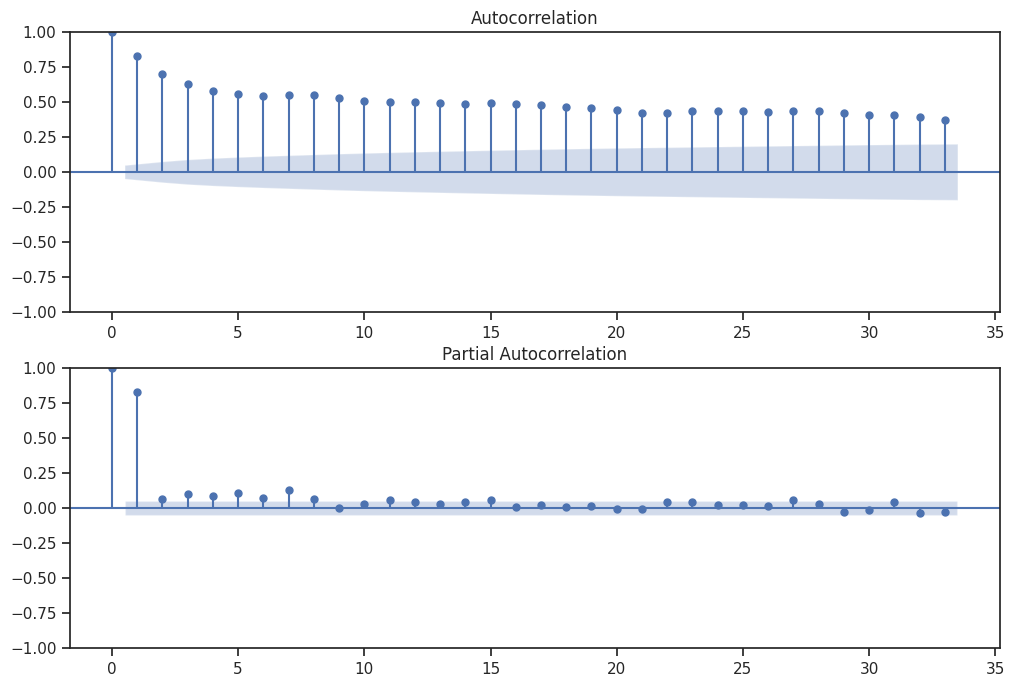

In [ ]:
#ACF/PACF Data Asli
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,ax=plt.subplots(2,figsize=(12,8))
ax[0]=plot_acf(data['temp'],ax=ax[0])
ax[1]=plot_pacf(data['temp'],ax=ax[1])

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['temp'])
result

(-4.090756809708725,
 0.0010031635361417563,
 14,
 1628,
 {'1%': -3.4343731208729635,
  '5%': -2.8633169753343646,
  '10%': -2.5677160229913856},
 2784.174445350127)

In [ ]:
# Output dari uji ADF
print(f'Hasil Uji ADF:\n')
print(f'Test Statistic \t\t\t\t: {result[0]:.5f}')
print(f'P-value \t\t\t\t: {result[1]:.5f}')
print(f'Lags Used \t\t\t\t: {result[2]}')
for key, value in result[4].items():
 print(f'Critical Values {key} \t\t\t: {value:.5f}')

Hasil Uji ADF:

Test Statistic 				: -4.09076
P-value 				: 0.00100
Lags Used 				: 14
Critical Values 1% 			: -3.43437
Critical Values 5% 			: -2.86332
Critical Values 10% 			: -2.56772


Nilai P-Value = 0.00100 menunjukkan data sudah stasioner, namun tetap akan dilakukan differencing dengan maksimal orde 3

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Differencing values
d = [1, 2, 3]

# List to store ADF results
tab_adf = []

# Loop over differencing values
for i in d:
    # Differencing the 'temp' column
    data['dtrans'] = data['temp'] - data['temp'].shift(i)

    # Perform ADF test, dropping NaN values caused by shift
    result = adfuller(data['dtrans'].dropna(), maxlag=7)

    # Append the results to the list
    tab_adf.append({
        'dtrans': i,
        'lag': result[2],
        'ADF Statistics': result[0],
        'p-value': result[1]
    })

# Create DataFrame from ADF test results
df_tab_adf = pd.DataFrame(tab_adf, columns=['dtrans', 'lag', 'ADF Statistics', 'p-value'])

# Display the DataFrame with ADF test results
print(df_tab_adf)

   dtrans  lag  ADF Statistics       p-value
0       1    6      -23.326679  0.000000e+00
1       2    7      -20.518640  0.000000e+00
2       3    7      -18.071299  2.603638e-30


Karena seluruh P-Value bernilai 0.000 maka semuanya stasioner. Akan dipilih differencing orde 1 karena memiliki nilai absolut ADF yang paling besar.

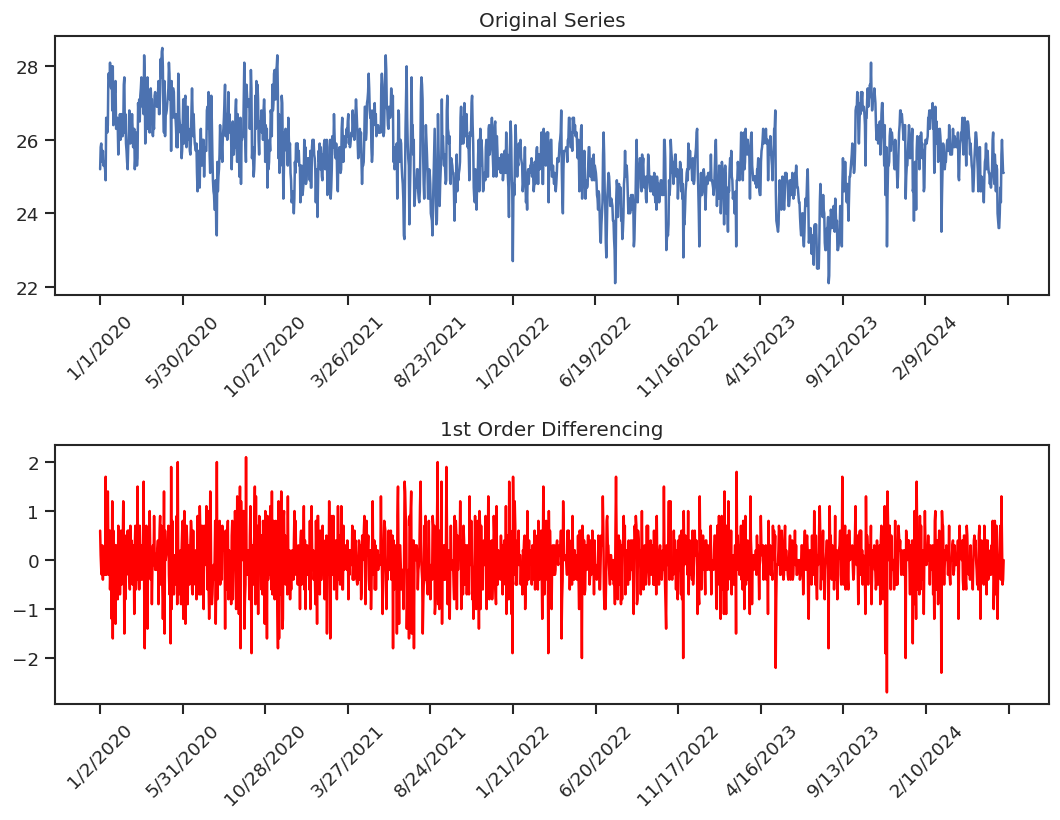

In [ ]:
# Define the 2D list of axes objects
fig, axes = plt.subplots(2, 1, figsize=(9, 7), dpi=120)

# Plot Original Series
axes[0].plot(data.index, data['temp'], label='Original')
axes[0].set_title('Original Series')
axes[0].tick_params(axis='x', rotation=45)  # Memiringkan label x-axis
axes[0].xaxis.set_major_locator(plt.MaxNLocator(16))  # Mengurangi jumlah label x-axis

# Plot First Order Differencing
axes[1].plot(data.index[1:], data['temp'].diff(1).dropna(), label='1st Order Differencing', color='red')
axes[1].set_title('1st Order Differencing')
axes[1].tick_params(axis='x', rotation=45)  # Memiringkan label x-axis
axes[1].xaxis.set_major_locator(plt.MaxNLocator(16))  # Mengurangi jumlah label x-axis

plt.tight_layout()  # Merapikan layout
plt.show()

Visualisasi differencing orde 1 sudah stasioner

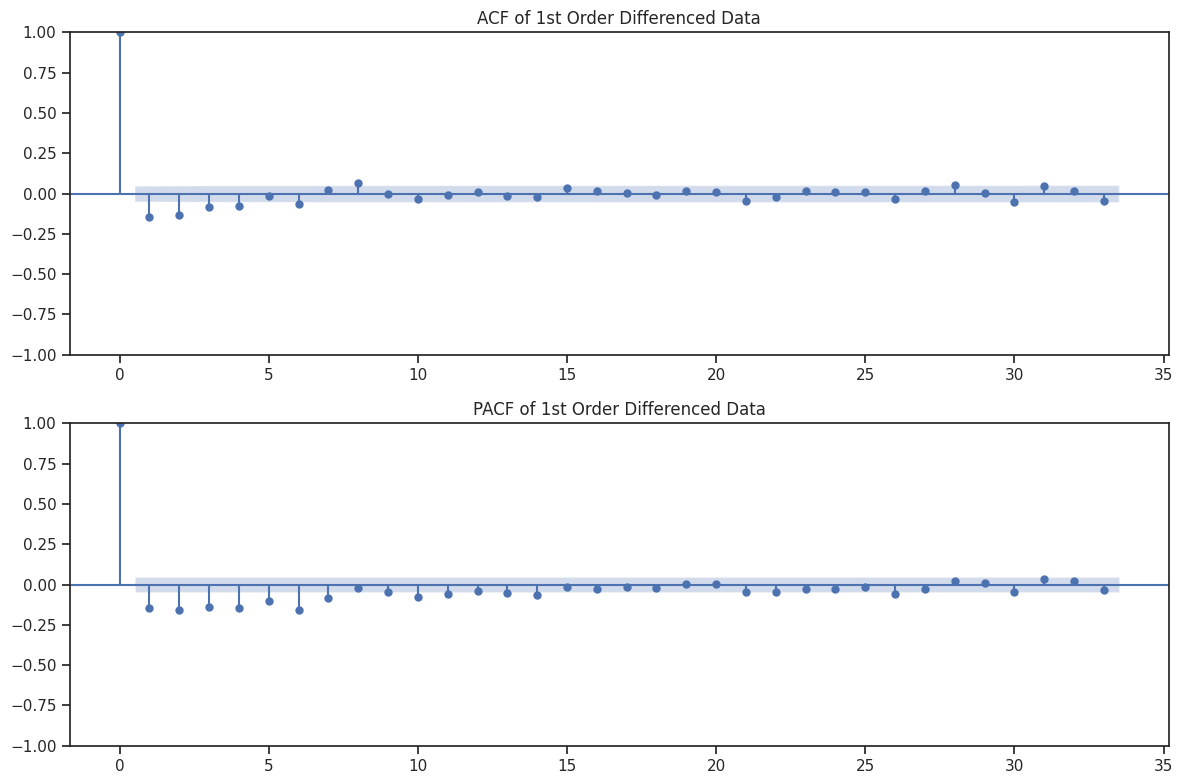

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Log transformation of the 'mag' column
data = data['temp']

# Create subplots for ACF and PACF
fig, ax = plt.subplots(2, figsize=(12, 8))

# Plot ACF of the 1st order differenced data
plot_acf(data.diff(1).dropna(), ax=ax[0])
ax[0].set_title('ACF of 1st Order Differenced Data')

# Plot PACF of the 1st order differenced data
plot_pacf(data.diff(1).dropna(), ax=ax[1])
ax[1].set_title('PACF of 1st Order Differenced Data')

# Show the plots
plt.tight_layout()
plt.show()
